# Tugas 2
### Dhafa Aryanda (2008107010032)

Bayangkan anda bekerja sebagai anggota dari CSI (Crime Scene Investigation). Anda bekerja sebagai ahli cyber forensic. Kali ini, anda mendapat pekerjaan untuk mengidentifikasikan gambar tato seorang kriminal yang didapat dari CCTV. Namun identitas orang tersebut belum dapat diketahui. Anda memiliki data gambar-gambar orang tersangka, ada yang memiliki tato dan ada juga yang tidak memiliki tato. Jadi tugas anda di sini, ialah mengidentifikasikan siapakah kriminal yang dimaksud berdasarkan data gambar-gambar yang dimiliki.

Panduan
 - Data gambar boleh disimpan di dalam folder, atau di dalam basis data.
 - Simpan image descriptor untuk semua file gambar
 - Baca semua data gambar dan temukan padanan antara descriptor dari image query dan descriptor dari semua gambar
 
 Gambar-gambar tato bisa diambil dari website kaggle.com atau website lainnya yang memiliki dataset gambar tato.

 Sertakan link google drive untuk mendownload gambar-gambar yang anda gunakan.

Gambar yang digunakan 
https://drive.google.com/drive/folders/1ExPf8vtXplt1Wi4Q0M5OUFi-iISMDTSQ?usp=sharing

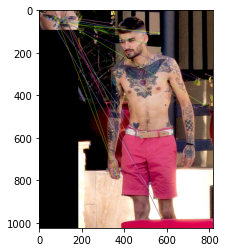

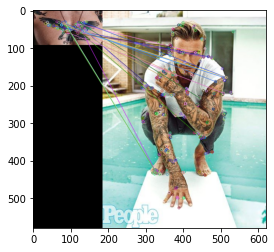

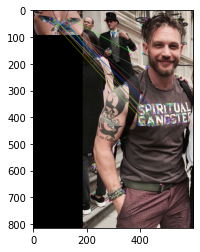

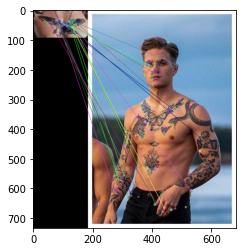

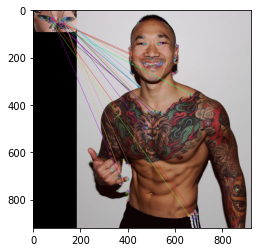

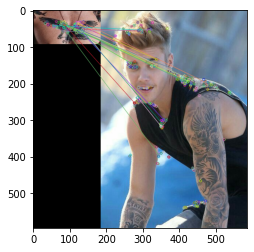

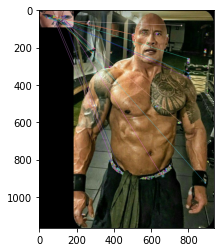

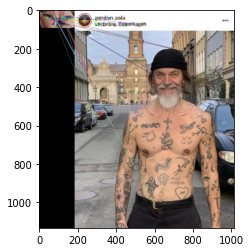

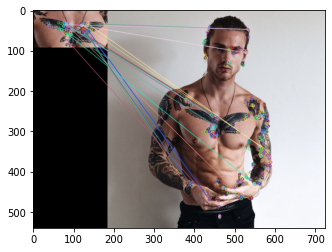

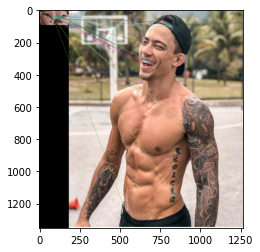

In [12]:
import numpy as np 
import cv2 
from matplotlib import pyplot as plt
     
# Read the training and query images
query_img = cv2.imread('gambar/tattoo.jpg') 

i = 1

while i <= 10 :
    train_img = cv2.imread('gambar/picture'+ str(i) +'.jpg') 
    i+=1
    # Convert the images to grayscale 
    query_img_gray = cv2.cvtColor(query_img,cv2.COLOR_BGR2GRAY) 
    train_img_gray = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY) 

    # Initialize the ORB detector algorithm 
    orb = cv2.ORB_create() 

    # Detect keypoints (features) cand calculate the descriptors
    query_keypoints, query_descriptors = orb.detectAndCompute(query_img_gray,None) 
    train_keypoints, train_descriptors = orb.detectAndCompute(train_img_gray,None) 

    # Match the keypoints
    matcher = cv2.BFMatcher() 
    matches = matcher.match(query_descriptors,train_descriptors) 

    # Draw the keypoint matches on the output image
    output_img = cv2.drawMatches(query_img, query_keypoints, 
    train_img, train_keypoints, matches[:20],None) 


    # Save the final image 
    output_img = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)
    plt.imshow(output_img),plt.show()
    